<a href="https://colab.research.google.com/github/FerdousJUST/Fish-Classification-model-in-cnn-2022__final-/blob/main/Fish_Image_Classification_My_Model_Final(001).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import imageio
import pathlib
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
import numpy as np
from glob import glob
from tensorflow.keras.layers import Input,Flatten,Dense,BatchNormalization,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

In [3]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [4]:

IMAGE_SIZE = [128,128]

train_path = '/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training'
valid_path = '/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Validation'

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (128,128),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (128,128),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4800 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.


In [6]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,padding='same', strides=(1, 1),dilation_rate=(1, 1),
                                    kernel_size=(3,3),activation = 'relu',input_shape = (128,128,3)),
                                    tf.keras.layers.MaxPool2D(2,2), 
                                   
                                    
                                    tf.keras.layers.Conv2D(32,padding='same',strides=(1, 1),dilation_rate=(1, 1),
                                    kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                 

                                    tf.keras.layers.Conv2D(64,padding='same',strides=(1, 1),dilation_rate=(1, 1),
                                    kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                   

                                    tf.keras.layers.Conv2D(128,padding='same',strides=(1, 1),dilation_rate=(1, 1),
                                    kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                  

                                    tf.keras.layers.Conv2D(256,padding='same',strides=(1, 1),dilation_rate=(1, 1),
                                    kernel_size=(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                                                                                    
                                    tf.keras.layers.Flatten(),

                                    tf.keras.layers.Dense(512,activation = 'relu'),
                                    tf.keras.layers.Dropout(0.2),                               

                                    tf.keras.layers.Dense(4,activation = 'softmax')
                                    ])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0

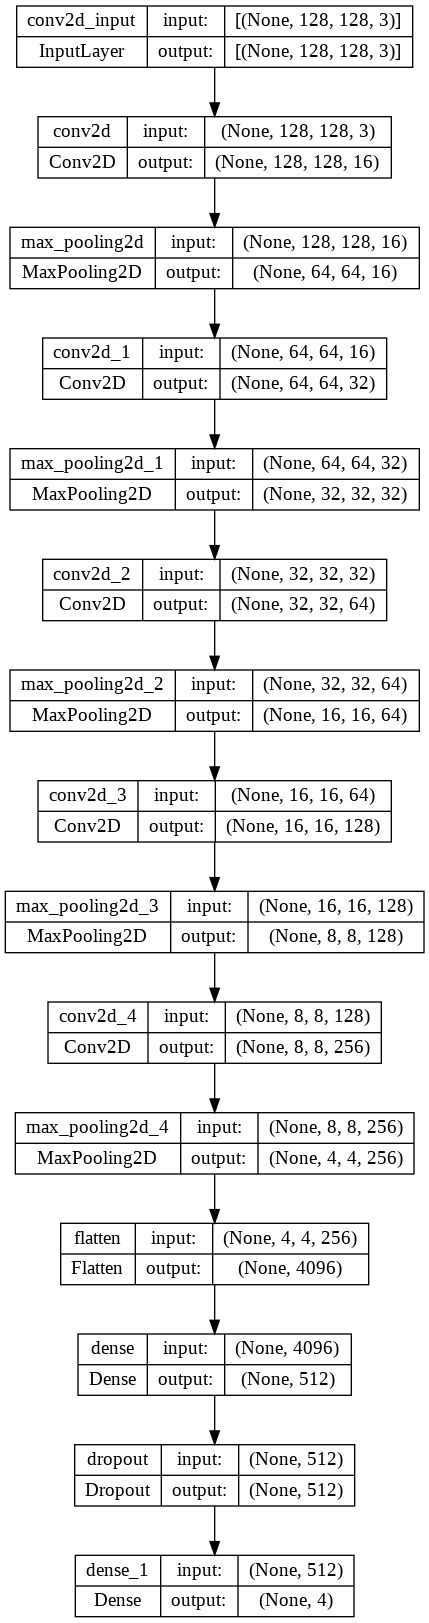

In [8]:
plot_model(model = model,show_shapes = True)

In [9]:
import tensorflow as tf

from keras.models import load_model

model.save('/content/drive/Shareddrives/Research Collaboration/Ferdous MSc Project/part fourteen/my_model_001_test.h5')

In [10]:
from tensorflow.keras.optimizers import Adam
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss = 'categorical_crossentropy',
              optimizer = opt,
              metrics = ['accuracy'])

In [11]:
from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
import h5py

In [12]:
erl_stop = EarlyStopping(monitor = 'val_loss',patience =10,restore_best_weights=True)
mod_chk = ModelCheckpoint(
    filepath='/content/drive/Shareddrives/Research Collaboration/Ferdous MSc Project/part fourteen/my_model_001_test(1).hdf5',
                          monitor = 'val_loss',save_best_only = True)
lr_rate = ReduceLROnPlateau(monitor = 'val_loss',patience =10,factor = 0.1)

In [13]:
hist = model.fit_generator(training_set, shuffle = True, epochs=30, validation_data=test_set,
                           callbacks = [erl_stop,mod_chk,lr_rate],verbose = 2,
                           steps_per_epoch=len(training_set),
                           validation_steps=len(test_set)
                           )

<ipython-input-13-5dfd3af06daf>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(training_set, shuffle = True, epochs=30, validation_data=test_set,


Epoch 1/30
150/150 - 1810s - loss: 0.9939 - accuracy: 0.5390 - val_loss: 1.1661 - val_accuracy: 0.5775 - lr: 1.0000e-04 - 1810s/epoch - 12s/step
Epoch 2/30
150/150 - 163s - loss: 0.6807 - accuracy: 0.7344 - val_loss: 1.0685 - val_accuracy: 0.5708 - lr: 1.0000e-04 - 163s/epoch - 1s/step
Epoch 3/30
150/150 - 160s - loss: 0.5117 - accuracy: 0.8112 - val_loss: 0.7038 - val_accuracy: 0.7475 - lr: 1.0000e-04 - 160s/epoch - 1s/step
Epoch 4/30
150/150 - 158s - loss: 0.3808 - accuracy: 0.8598 - val_loss: 0.5487 - val_accuracy: 0.7992 - lr: 1.0000e-04 - 158s/epoch - 1s/step
Epoch 5/30
150/150 - 163s - loss: 0.3143 - accuracy: 0.8860 - val_loss: 0.4574 - val_accuracy: 0.8550 - lr: 1.0000e-04 - 163s/epoch - 1s/step
Epoch 6/30
150/150 - 164s - loss: 0.2817 - accuracy: 0.8960 - val_loss: 0.4186 - val_accuracy: 0.8458 - lr: 1.0000e-04 - 164s/epoch - 1s/step
Epoch 7/30
150/150 - 158s - loss: 0.2615 - accuracy: 0.9002 - val_loss: 0.4512 - val_accuracy: 0.8558 - lr: 1.0000e-04 - 158s/epoch - 1s/step
Epo

In [14]:
acc = model.evaluate(test_set,steps = len(test_set),verbose = 2)
print('%.2f'%(acc[1]*100))

38/38 - 16s - loss: 0.0840 - accuracy: 0.9675 - 16s/epoch - 431ms/step
96.75


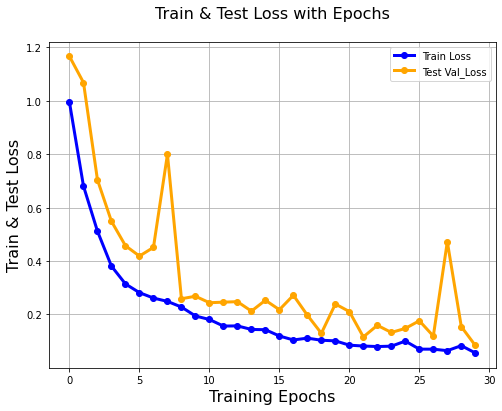

In [15]:
plt.figure(figsize = (8,6))
plt.plot(hist.history['loss'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
plt.plot(hist.history['val_loss'],'b-o',color = 'orange',label = 'train',linewidth=3.0)
plt.grid(True)
epochs = range(1,20)
plt.legend(['Train Loss', 'Test Val_Loss'], loc='upper right')
plt.title("Train & Test Loss with Epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 16)
plt.ylabel("Train & Test Loss",fontsize =16)
plt.show()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


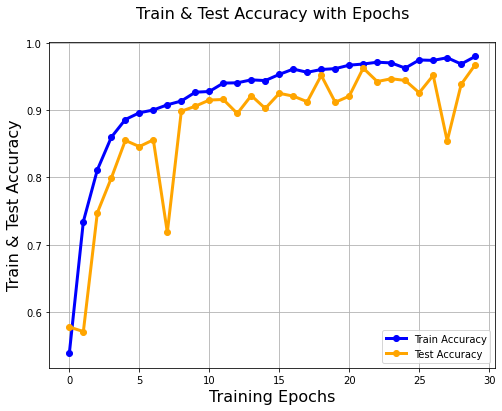

In [16]:
plt.figure(figsize = (8,6))
plt.plot(hist.history['accuracy'],'b-o',color = 'blue',label = 'train',linewidth=3.0)
plt.plot(hist.history['val_accuracy'],'b-o',color = 'orange',label = 'train',linewidth=3.0)
plt.grid(True)
epochs = range(1,10)
#plt.legend(['loss', 'val_loss'], loc='upper right')
plt.legend(['Train Accuracy', 'Test Accuracy'], loc='lower right')
plt.title("Train & Test Accuracy with Epochs\n",fontsize = 16)
plt.xlabel("Training Epochs",fontsize= 16)
plt.ylabel("Train & Test Accuracy",fontsize =16)
plt.show()

In [17]:
from tensorflow.python.ops.gen_math_ops import Round
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img, img_to_array
test_image = load_img(
'/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Training/Tilapia_Fish/Tilapia_Fish 004.png', 
                      target_size = (128,128))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
rslt = model.predict(test_image)
print (rslt)


list_index = [0,1,2,3]

x = rslt

for i in range(4):
  for j in range(4):
    if x[0][list_index[i]] > x[0][list_index[j]]:
          temp = list_index[i]
          list_index[i] = list_index[j]
          list_index[j] = temp

print(list_index)

classification = ['Barbel_Fish','Hilsha_Fish','Spotted_Snakehead_Fish','Tilapia_Fish']
     

for i in range(4):
  print(classification[list_index[i]], ':', round(rslt[0][list_index[i]] * 100,2),'%')

1/1 [==============================] - 0s 179ms/step
[[0. 0. 0. 1.]]
[3, 1, 2, 0]
Tilapia_Fish : 100.0 %
Hilsha_Fish : 0.0 %
Spotted_Snakehead_Fish : 0.0 %
Barbel_Fish : 0.0 %


In [18]:
from tensorflow.python.ops.gen_math_ops import Round
from keras.preprocessing import image
import numpy as np
from keras.utils import load_img, img_to_array
test_image = load_img(
'/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Validation/Barbel_Fish/Barbel_Fish 003.png', 
                      target_size = (128,128))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
rslt = model.predict(test_image)
print (rslt)


list_index = [0,1,2,3]

x = rslt

for i in range(4):
  for j in range(4):
    if x[0][list_index[i]] > x[0][list_index[j]]:
          temp = list_index[i]
          list_index[i] = list_index[j]
          list_index[j] = temp

print(list_index)

classification = ['Barbel_Fish','Hilsha_Fish','Spotted_Snakehead_Fish','Tilapia_Fish']
     

for i in range(4):
  print(classification[list_index[i]], ':', round(rslt[0][list_index[i]] * 100,2),'%')

1/1 [==============================] - 0s 28ms/step
[[0. 1. 0. 0.]]
[1, 0, 2, 3]
Hilsha_Fish : 100.0 %
Barbel_Fish : 0.0 %
Spotted_Snakehead_Fish : 0.0 %
Tilapia_Fish : 0.0 %


In [19]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score

In [20]:
y_pred = model.predict(test_set)

38/38 [==============================] - 15s 399ms/step


In [21]:
y_pred = np.argmax(y_pred,axis = 1)

In [22]:
y_pred.shape

(1200,)

In [34]:
# test
import glob
import cv2
SIZE=128
test_images = []
test_labels = [] 
for directory_path in glob.glob("/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Validation New/*"):
    fruit_label = directory_path.split("\\")[-1]
    print(fruit_label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(fruit_label)
        
test_images = np.array(test_images)
test_labels = np.array(test_labels)

/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Validation New/Tilapia_Fish
/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Validation New/Spotted_Snakehead_Fish
/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Validation New/Barbel_Fish
/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Validation New/Hilsha_Fish


In [36]:
import os
import cv2

path="/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Validation"
def imagearray(path,size):
  data = []
  for folder in os.listdir(path):
       sub_path = path +"/"+ folder

  for img in os.listdir(sub_path):
      image_path = sub_path + "/"+ img
      img_arr = cv2.imread(image_path)
      img_arr = cv2.resize(img_arr,size)
      data.append(img_arr)

  return data

In [24]:
test_set = '/content/drive/Shareddrives/Research Collaboration/Image_Classification_Dataset/Validation'

In [25]:
size = (64,64)
test = imagearray(test_set,size)
x_test = np.array(test)
x_test = x_test/255

In [40]:
size = (64,64)
test = imagearray(test_set,size)
x_test = np.array(test)
x_test = x_test/255

In [35]:
test_images.shape

(1200, 128, 128, 3)

In [26]:
x_test.shape

(300, 64, 64, 3)

In [ ]:
def data_class(data_path,size,class_mode):
    datagen  = ImageDataGenerator(rescale=1./255)
    classes = datagen.flow_from_directory(data_path,
                                          target_size = size,
                                          batch_size = 32,
                                          class_mode = class_mode)
    return classes

In [ ]:
test_class = data_class(test_set,size,"sparse")

Found 1200 images belonging to 4 classes.


In [ ]:
y_test = test_class.classes

In [ ]:
y_test.shape

(1200,)

In [38]:
print(classification_report(test_images,y_pred))

ValueError: ignored

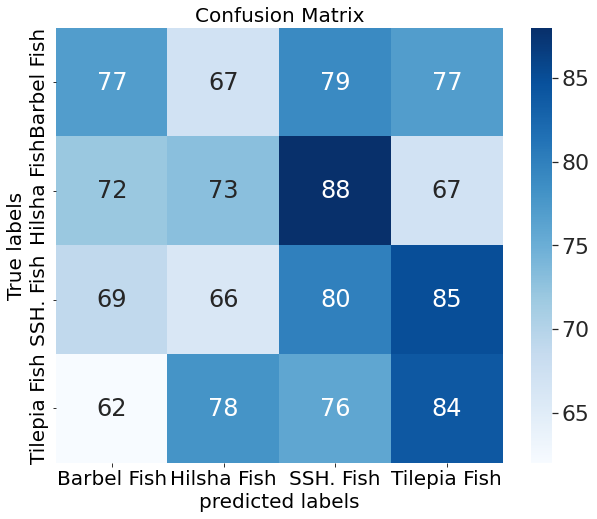

In [ ]:
import seaborn as sns
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(10,8))
ax = plt.subplot()
sns.set(font_scale = 2.0)
sns.heatmap(cm,annot = True,fmt ='g',cmap = "Blues",ax=ax);

ax.set_xlabel('predicted labels',fontsize = 20);
ax.set_ylabel('True labels',fontsize = 20);
ax.set_title('Confusion Matrix',fontsize = 20);
ax.xaxis.set_ticklabels(['Barbel Fish','Hilsha Fish','SSH. Fish','Tilepia Fish'],fontsize = 20);
ax.yaxis.set_ticklabels(['Barbel Fish','Hilsha Fish','SSH. Fish','Tilepia Fish'],fontsize = 20);

In [ ]:
f1_score(y_test,y_pred,average = 'macro')

0.26160026536173

In [ ]:
recall_score(y_test,y_pred,average = 'weighted')

0.26166666666666666

In [ ]:
precision_score(y_test,y_pred,average = 'macro')

0.26202271978143304